In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timedelta

from water_pollution.api import ann_utils as util

In [58]:
stationdf = util.get_stations_df().sort_values('alt',ascending=False)
stationdf

,label,alt,river_id,river_label,coord,mean_nitrate
id,,,,,,
6000990,BELRUPT,292,U---0000,La Saône,"(48.090273327987276, 6.101940890815991)",4.513699
6000998,MONTHUREUX-SUR-SAONE 2,241,U---0000,La Saône,"(48.01825125838868, 5.941492053405311)",6.428571
6000993,JONVELLE,230,U---0000,La Saône,"(47.93638044949666, 5.923536232871648)",9.433333
6001000,CENDRECOURT,213,U---0000,La Saône,"(47.84026083741255, 5.917378095285407)",9.233333
6003600,SCEY-SUR-SAONE-ET-ST-ALBI,210,U---0000,La Saône,"(47.661731120409826, 5.972459738821173)",8.421519
6002500,PORT-SUR-SAONE,208,U---0000,La Saône,"(47.69107833426886, 6.039291564176292)",7.489474
6005500,APREMONT 1,190,U---0000,La Saône,"(47.39571566626848, 5.544088676925676)",10.553020
6011000,AUXONNE 1,185,U---0000,La Saône,"(47.194519280308995, 5.382571963766932)",10.828667
6017050,CHARREY-SUR-SAONE,180,U---0000,La Saône,"(47.07369860831355, 5.165636185828038)",10.831410


In [185]:
# Station_id, choisi par l'interface
station_id = 6000998

In [186]:
# Resquests the API
url = 'https://api-te5jtpgwkq-ew.a.run.app/predict'
params = { 'station_id':station_id}
response = requests.get(url,params)

In [187]:
# Converts the response to a dataframe
jr = response.json()
preddf = pd.DataFrame(jr)
preddf.date = pd.to_datetime(preddf.date)
preddf.set_index('date',inplace=True)

preddf

,precipitation,temp,prediction
date,,,
2021-08-10,5.777143,12.5275,4.272208
2021-08-11,5.820000,12.8625,4.384604
2021-08-12,6.217143,13.3100,4.730520
2021-08-13,6.208571,13.8100,4.765598
2021-08-14,6.200000,14.2375,4.782055
...,...,...,...
2021-12-11,0.625714,8.0300,10.979283
2021-12-12,0.848571,7.7875,11.109204
2021-12-13,1.040000,7.5625,11.199736


(18842.65, 18982.35)


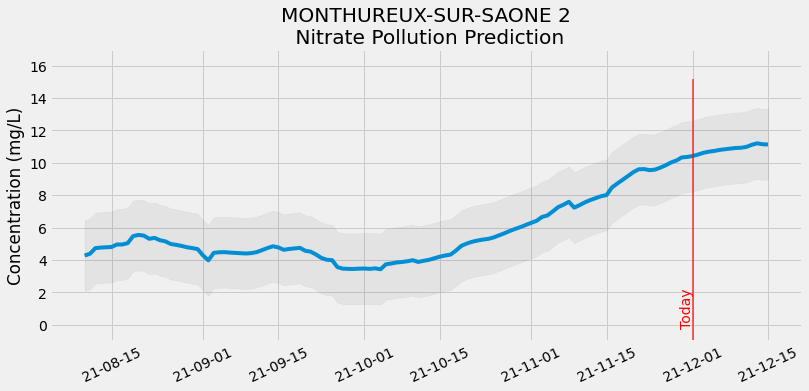

In [190]:
with plt.style.context('fivethirtyeight'):
    
    # Used Variables
    today = date.today()
    rmse = 2.19
    station_name = stationdf.loc[station_id,'label'] # CHANGE IT IN FRONT
    
    plt.figure(figsize=(12,5))
    ax = plt.gca()
    
    # Date Format
    dt_fmt = mdates.DateFormatter('%y-%m-%d')
    ax.xaxis.set_major_formatter(dt_fmt)
    
    # Prediction Plot
    plt.title(f'{station_name}\n Nitrate Pollution Prediction')
    plt.plot(preddf.index,preddf.prediction)
    plt.ylabel('Concentration (mg/L)')

    
    # Plots the rmse delta
    plt.fill_between(preddf.index,
                     preddf.prediction - rmse,
                     preddf.prediction + rmse,
                     color='k',alpha=.05)

    # Plots the today line
    ax.axvline(x=today, ymin=0., ymax=0.9, c='red', alpha=0.6, linewidth=2)
    ax.text(today-timedelta(1), 0,"Today", alpha=1,ha='center',color='red',rotation=90) # centré
    
    plt.xticks(rotation=25)
    
    plt.ylim(bottom=-1)
    plt.ylim(top=plt.ylim()[1]+3)
    print(plt.xlim())
    plt.show()
    